In [1]:
from itertools import compress
import os
import pandas as pd

import random
from sklearn.preprocessing import LabelEncoder

import torch
import torchaudio as ta
from torchcodec.decoders import AudioDecoder
import torchaudio.functional as AF
from torch.utils.data import Dataset, DataLoader

from functions.dl.data_classes import SpectroDataset, CombinedSpectroDataset, SpectroDataLoader

In [2]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [12]:
r_path ="./AudioTensors"
l_path = os.getcwd()

In [13]:
dir_files = os.listdir(l_path)
parquet_file = next(f for f in dir_files if f.endswith("_single.parquet"))
sound_df = pd.read_parquet(os.path.join(l_path, parquet_file))
sound_df = sound_df.drop(sound_df.loc[sound_df.label.isna()].index)

In [14]:
sound_df

id label                                           geometry
0       1000106   312  b'\x01\x01\x00\x00\x00\x8d\x02\xe1\xdcW\xd7NA\...
1       1000371   312   b'\x01\x01\x00\x00\x00\xf8=\xfb;\xbamPAkmD4quIA'
2       1001124   313  b'\x01\x01\x00\x00\x00\r?g\xbf\xfa\xc2OA\x1e\x...
3       1001127   313  b'\x01\x01\x00\x00\x00\xdeiL\x0c\n\xc3OA:\xfa\...
4        100114   231  b'\x01\x01\x00\x00\x00\xa3\x18|\xd0\xdbCPA\xb4...
...         ...   ...                                                ...
157363   999439   322  b'\x01\x01\x00\x00\x00\xc8\xf7X\x98rKQA\xe4\xb...
157364   999547   312  b'\x01\x01\x00\x00\x00\xf9\xf1<\xae\xaemPA\xcc...
157365    99984   313  b'\x01\x01\x00\x00\x00\x16\xa1\xc9\x9f\xdf\xbf...
157366    99986   313  b'\x01\x01\x00\x00\x00\x16\xa1\xc9\x9f\xdf\xbf...
157367    99988   312  b'\x01\x01\x00\x00\x00*\x85\x030C\xbfPA#|\x01W...

[157368 rows x 3 columns]

In [97]:
dawn_file = "F:/Persönliches/Git/BioOTon/points_single.parquet"
xeno_file = "F:/Persönliches/Git/BioOTon/xeno_points_single.parquet"
augmented_file = "F:/Persönliches/Git/BioOTon/augmented_points_single.parquet"

ds = CombinedSpectroDataset(dawn_file, xeno_file, augmented_file, device = device, denoised = True)

In [98]:
dawn_df = pd.read_parquet(dawn_file)
xeno_df = pd.read_parquet(xeno_file)
xeno_df.id = xeno_df.id.astype(int)
aug_df = pd.read_parquet(augmented_file)

In [99]:
i = 201000
ds.combined_file_paths[i], ds.combined_point_labels[i]

(WindowsPath('F:/Persönliches/Git/BioOTon/augmented_data_denoised/wn_979694_audio_dn.pt'),
 '211')

In [100]:
dawn_df.loc[dawn_df.id == int(ds.combined_file_paths[i].stem.replace("wn_","").replace("_audio_dn",""))]

Empty DataFrame
Columns: [id, geometry, label]
Index: []

In [101]:
xeno_df.loc[xeno_df.id == int(ds.combined_file_paths[i].stem.replace("wn_","").replace("_audio_dn",""))]

id                                           geometry label
6856  979694  b'\x01\x01\x00\x00\x00\xf3\xab\xc0\x04\xae\xc9...   211

In [102]:
aug_df.loc[aug_df.id == int(ds.combined_file_paths[i].stem.replace("wn_","").replace("_audio_dn",""))]

id label                                           geometry
15664   979694   211  b'\x01\x01\x00\x00\x00\xf3\xab\xc0\x04\xae\xc9...
31391   979694   211  b'\x01\x01\x00\x00\x00\xf3\xab\xc0\x04\xae\xc9...
47118   979694   211  b'\x01\x01\x00\x00\x00\xf3\xab\xc0\x04\xae\xc9...
62845   979694   211  b'\x01\x01\x00\x00\x00\xf3\xab\xc0\x04\xae\xc9...
78589   979694   211  b'\x01\x01\x00\x00\x00\xf3\xab\xc0\x04\xae\xc9...
94316   979694   211  b'\x01\x01\x00\x00\x00\xf3\xab\xc0\x04\xae\xc9...
110070  979694   211  b'\x01\x01\x00\x00\x00\xf3\xab\xc0\x04\xae\xc9...
125797  979694   211  b'\x01\x01\x00\x00\x00\xf3\xab\xc0\x04\xae\xc9...
141551  979694   211  b'\x01\x01\x00\x00\x00\xf3\xab\xc0\x04\xae\xc9...
157305  979694   211  b'\x01\x01\x00\x00\x00\xf3\xab\xc0\x04\xae\xc9...

In [59]:
from functions.fair_train_test.utils_real_set import SpatialFairSplit

In [7]:
import pandas as pd
import geopandas as gpd

In [61]:
pframe  = pd.read_parquet("./dawn-chorus-soundscape.parquet")

In [71]:
pframe  = pd.read_parquet("./dawn-chorus-soundscape.parquet")
pframe = pframe[["id", "lat", "lng"]]
pframe = pframe.rename(columns={"lat":"Y", "lng":"X"})

In [56]:
pframes  = pd.read_parquet("./points_single.parquet")

In [3]:
from pathlib import Path
import os

In [11]:
Path(os.getcwd(), "abc.pt").stem

'abc'

In [ ]:
pframes  = pd.read_parquet("./points_single.parquet")
pframes["geometry"] = gpd.GeoSeries.from_wkb(pframes.geometry)
pframes["X"] = gpd.GeoSeries(pframes.geometry).x
pframes["Y"] = gpd.GeoSeries(pframes.geometry).x
pframes.drop("geometry", axis=1, inplace=True)

In [69]:
gpd.GeoSeries(pframes.geometry).y[1]

np.float64(3079768.9582882784)

In [14]:
import paramiko
import getpass
from pathlib import Path

host = 'os-login.lsdf.kit.edu'
    
port = 22
username = input("Enter username: ") or "uyrra"
password = getpass.getpass("Enter password: ")

transport = paramiko.Transport((host, port))
transport.connect(username = username, password = password)

sftp = paramiko.SFTPClient.from_transport(transport)
sftp.chdir("./data")

input_dir ="./AudioTensors"
output_dir = "./AudioTensors"

local_files = list(Path(input_dir).glob("*.pt"))
local_files_list = [file.name for file in local_files]

remote_files = sftp.listdir(output_dir)

files = [x for x in local_files_list if x not in remote_files]


print(f"Total files to process: {len(files)}")

Total files to process: 3


In [27]:
from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor
import ffmpeg
from functools import partial
import getpass
import io
import os
import paramiko
import random
import time
import torch
import tqdm
import numpy as np
import noisereduce as nr
import threading
thread_local = threading.local()

def get_sftp():
    """Returns the SFTP client for the current thread, creating it if it doesn't exist."""
    if not hasattr(thread_local, "sftp"):
        time.sleep(random.uniform(0, 256))
        transport = paramiko.Transport((host, port))
        # Use your existing username/password variables here
        transport.connect(username=username, password=password)
        thread_local.transport = transport
        thread_local.sftp = paramiko.SFTPClient.from_transport(transport)
        thread_local.sftp.chdir("./data")
    return thread_local.sftp

def loadPT(input_dir, audio_file):
    """
    Instantiates a torch audio file.

    Input:
        audio_file - path to the .pt-file

    Output: 
        audio_file - the loaded tensor
    """
    #sftp = get_sftp()
    print(f"Opening from {sftp.getcwd()}/{input_dir}/{str(audio_file)}")
    with sftp.open(f"{sftp.getcwd()}/{input_dir}/{str(audio_file)}", 'rb') as remote_file:
        file_content = remote_file.read()
        buffer = io.BytesIO(file_content)
        return torch.load(buffer, map_location=torch.device('cpu'))

In [57]:
dawn_dir = Path("./AudioTensors_denoised_cut")

In [58]:
dawn_dir

WindowsPath('AudioTensors_denoised_cut')

In [56]:
dawn_dir.parent

WindowsPath('f:/Persönliches/Git/BioOTon')

In [31]:
host = 'os-login.lsdf.kit.edu'
port = 22

transport = paramiko.Transport((host, port))

username = input("Enter username: ") or "uyrra"
password = getpass.getpass("Enter password: ")

transport.connect(username = username, password = password)

sftp = paramiko.SFTPClient.from_transport(transport)
sftp.chdir("./data")

input_dir ="./AudioTensors"
output_dir = "./AudioTensors_denoised"

files = sftp.listdir(input_dir)

loadPT("./AudioTensors", files[0])

Opening from /lsdf01/lsdf/kit/stud/uyrra/data/./AudioTensors/27845214_audio.pt


tensor([ 0.0000,  0.0000,  0.0000,  ..., -0.0884, -0.0164, -0.0554],
       dtype=torch.float16)

In [30]:
files

['27845214_audio.pt',
 '22671133_audio.pt',
 '24593296_audio.pt',
 '21946266_audio.pt',
 '28075247_audio.pt',
 '27906968_audio.pt',
 '22970747_audio.pt',
 '27790256_audio.pt',
 '27964271_audio.pt',
 '22599753_audio.pt',
 '23042141_audio.pt',
 '28225392_audio.pt',
 '27892846_audio.pt',
 '22459843_audio.pt',
 '23899852_audio.pt',
 '25569980_audio.pt',
 '27442377_audio.pt',
 '27933269_audio.pt',
 '23522911_audio.pt',
 '26834566_audio.pt',
 '22398870_audio.pt',
 '22471077_audio.pt',
 '22970726_audio.pt',
 '27969985_audio.pt',
 '27634854_audio.pt',
 '22758824_audio.pt',
 '19968084_audio.pt',
 '22289418_audio.pt',
 '22638266_audio.pt',
 '22299429_audio.pt',
 '27702246_audio.pt',
 '22504711_audio.pt',
 '29037613_audio.pt',
 '27438943_audio.pt',
 '22454804_audio.pt',
 '22387141_audio.pt',
 '28423810_audio.pt',
 '28184219_audio.pt',
 '27587080_audio.pt',
 '22616648_audio.pt',
 '23887702_audio.pt',
 '27602599_audio.pt',
 '22298155_audio.pt',
 '25241406_audio.pt',
 '27833597_audio.pt',
 '23231699

In [19]:
import paramiko
import getpass

host = 'os-login.lsdf.kit.edu'
# host = "os-webdav.lsdf.kit.edu"
port = 22
transport = paramiko.Transport((host, port))

# password = "THEPASSWORD"
# username = "THEUSERNAME"
username = input("Enter username: ") or "uyrra"
transport.connect(username = username, password = getpass.getpass("Enter password: "))

sftp = paramiko.SFTPClient.from_transport(transport)

AuthenticationException: Authentication failed.

In [ ]:
sftp.chdir("./data")

In [52]:
print(sftp.getcwd())

/lsdf01/lsdf/kit/stud/uyrra/data


In [54]:
from pathlib import Path

In [55]:
file_dir = Path("./AudioTensors_denoised")

In [56]:
file_dir.stem

'AudioTensors_denoised'

In [57]:
host = 'os-login.lsdf.kit.edu'
# host = "os-webdav.lsdf.kit.edu"
port = 22
transport = paramiko.Transport((host, port))

file_dir = Path("./AudioTensors_denoised")
files = list(file_dir.glob("*.pt"))

# password = "THEPASSWORD"
# username = "THEUSERNAME"
username = input("Enter username: ") or "uyrra"
transport.connect(username = username, password = getpass.getpass("Enter password: "))

sftp = paramiko.SFTPClient.from_transport(transport)
sftp.chdir("./data")
print(sftp.getcwd())

sftp.mkdir(file_dir.stem)

print(f"Total files to process: {len(files)}")

/lsdf01/lsdf/kit/stud/uyrra/data
Total files to process: 43826


In [73]:
def push_to_lsdf(sftp, output_dir, file):
    target_path = f"{output_dir.stem}/{file.stem}"
    sftp.put(file, target_path)

In [ ]:
push_to_lsdf(sftp, file_dir, files[0])

Socket exception: Eine vorhandene Verbindung wurde vom Remotehost geschlossen (10054)
Socket exception: Eine vorhandene Verbindung wurde vom Remotehost geschlossen (10054)
Socket exception: Eine vorhandene Verbindung wurde vom Remotehost geschlossen (10054)
Socket exception: Eine vorhandene Verbindung wurde vom Remotehost geschlossen (10054)
Socket exception: Eine vorhandene Verbindung wurde vom Remotehost geschlossen (10054)


In [ ]:
import paramiko
import getpass

host = 'os-login.lsdf.kit.edu'
# host = "os-webdav.lsdf.kit.edu"
port = 22
transport = paramiko.Transport((host, port))

# password = "THEPASSWORD"
# username = "THEUSERNAME"
username = input("Enter username: ") or "uyrra"
transport.connect(username = username, password = getpass.getpass("Enter password: "))

sftp = paramiko.SFTPClient.from_transport(transport)
sftp.chdir("./data")
print(sftp.getcwd())
sftp.listdir("")
sftp.close()
transport.close()
print('Upload done.')

[]

In [ ]:
sftp.close()
transport.close()
print('Upload done.')

Upload done.


In [ ]:
import sys
path = './THETARGETDIRECTORY/' + sys.argv[1]    #hard-coded
localpath = sys.argv[1]
sftp.put(localpath, path)

sftp.close()
transport.close()
print('Upload done.')


In [1]:
from ftplib import FTP

In [27]:
ftp = FTP('os-webdav.lsdf.kit.edu', user=username, passwd=getpass.getpass())

TimeoutError: [WinError 10060] Ein Verbindungsversuch ist fehlgeschlagen, da die Gegenstelle nach einer bestimmten Zeitspanne nicht richtig reagiert hat, oder die hergestellte Verbindung war fehlerhaft, da der verbundene Host nicht reagiert hat

In [1]:
from concurrent.futures import ProcessPoolExecutor, ThreadPoolExecutor
import getpass
import os
import paramiko
from pathlib import Path
import random
import time
import threading
import torch
import tqdm

thread_local = threading.local()
pool = None

class SFTPConnectionPool:
    def __init__(self, host, port, username, password):
        self.host = host
        self.port = port
        self.username = username
        self.password = password
        self.transport = None
        self._lock = threading.Lock()
        self.thread_local = threading.local()

    def _get_transport(self):
        with self._lock:
            # Check if transport is dead or closed
            if self.transport is None or not self.transport.is_active():
                print(f"[{threading.current_thread().name}] Establishing new Transport...")
                self.transport = paramiko.Transport((self.host, self.port))
                self.transport.connect(username=self.username, password=self.password)
            return self.transport

    def get_sftp(self):
        # If the thread already has a client, check if it's still alive
        if hasattr(self.thread_local, "sftp"):
            try:
                self.thread_local.sftp.listdir('.') # Test the connection
                return self.thread_local.sftp
            except:
                del self.thread_local.sftp # It's dead, remove it

        # Attempt to create a new SFTP client with retries
        for i in range(5): # Try 5 times to get a channel
            try:
                time.sleep(random.uniform(0, 32))
                transport = self._get_transport()
                sftp = paramiko.SFTPClient.from_transport(transport)
                sftp.chdir("./data")
                self.thread_local.sftp = sftp
                return sftp
            except Exception as e:
                wait = (i + 1) * 2
                print(f"Channel failed, retrying in {wait}s... Error: {e}")
                time.sleep(wait)
                # Force transport reset on 3rd failure
                if i == 2: self.transport = None 
        
        raise RuntimeError("Could not connect to SFTP after 5 attempts")

In [ ]:
host = 'os-login.lsdf.kit.edu'
port = 22

username = input("Enter username: ") or "uyrra"
password = getpass.getpass("Enter password: ")

pool = SFTPConnectionPool(host, port, username, password)

main_sftp = pool.get_sftp()
main_sftp.chdir(".")

input_dir = f"./AudioTensors_denoised"
output_dir = f"./AudioTensors_denoised_cut"

files = main_sftp.listdir(output_dir)

processed_files = [f for f in files if f.startswith("cut_0")]
cut_processed_files = [x[6:] for x in processed_files]

print(f"Found {len(cut_processed_files)} files that are not corrupted.")

local_files = list(Path(input_dir).glob("*.pt"))
local_files_list = [file.name for file in local_files]


corrupted_files = [x for x in local_files_list if x not in cut_processed_files]

print(f"Total files to process: {len(corrupted_files)}")

[MainThread] Establishing new Transport...
['cut_3_22943907_audio_dn.pt', 'cut_1_28020244_audio_dn.pt', 'cut_0_29021020_audio_dn.pt', 'cut_0_27669202_audio_dn.pt', 'cut_0_19226760_audio_dn.pt', 'cut_0_22806825_audio_dn.pt', 'cut_1_27587896_audio_dn.pt', 'cut_0_23023296_audio_dn.pt', 'cut_4_rem_23822837_audio_dn.pt', 'cut_0_22779757_audio_dn.pt', 'cut_1_27729744_audio_dn.pt', 'cut_1_27383368_audio_dn.pt', 'cut_0_27892624_audio_dn.pt', 'cut_3_27305497_audio_dn.pt', 'cut_0_23129858_audio_dn.pt', 'cut_0_22822782_audio_dn.pt', 'cut_4_rem_27478737_audio_dn.pt', 'cut_1_23042170_audio_dn.pt', 'cut_1_22796542_audio_dn.pt', 'cut_1_28007196_audio_dn.pt', 'cut_4_rem_22516224_audio_dn.pt', 'cut_4_rem_23041682_audio_dn.pt', 'cut_3_rem_23375195_audio_dn.pt', 'cut_0_26757549_audio_dn.pt', 'cut_2_24059714_audio_dn.pt', 'cut_0_27438857_audio_dn.pt', 'cut_0_27655718_audio_dn.pt', 'cut_0_27578996_audio_dn.pt', 'cut_1_27702202_audio_dn.pt', 'cut_2_27603555_audio_dn.pt', 'cut_1_27773644_audio_dn.pt', 'cut_0

In [11]:
processed_files[0]

'cut_0_29021020_audio_dn.pt'

In [3]:
import requests
from requests.auth import HTTPBasicAuth
import getpass

In [9]:
host = 'https://os-webdav.lsdf.kit.edu'
user = input("Username: ")
password = getpass.getpass()

response = requests.request('PROPFIND', host, auth=HTTPBasicAuth(user, password))

In [5]:
response

<Response [401]>

In [19]:
cut_processed_files

['29021020_audio_dn.pt',
 '27669202_audio_dn.pt',
 '19226760_audio_dn.pt',
 '22806825_audio_dn.pt',
 '23023296_audio_dn.pt',
 '22779757_audio_dn.pt',
 '27892624_audio_dn.pt',
 '23129858_audio_dn.pt',
 '22822782_audio_dn.pt',
 '26757549_audio_dn.pt',
 '27438857_audio_dn.pt',
 '27655718_audio_dn.pt',
 '27578996_audio_dn.pt',
 '27909026_audio_dn.pt',
 '27738653_audio_dn.pt',
 '28068466_audio_dn.pt',
 '27603783_audio_dn.pt',
 '22637451_audio_dn.pt',
 '27489073_audio_dn.pt',
 '27488983_audio_dn.pt',
 '28054512_audio_dn.pt',
 '23415800_audio_dn.pt',
 '27483444_audio_dn.pt',
 '27564278_audio_dn.pt',
 '22975838_audio_dn.pt',
 '26620338_audio_dn.pt',
 '23066540_audio_dn.pt',
 '26764529_audio_dn.pt',
 '27454090_audio_dn.pt',
 '27471598_audio_dn.pt',
 '27729495_audio_dn.pt',
 '25794580_audio_dn.pt',
 '19968142_audio_dn.pt',
 '27380968_audio_dn.pt',
 '28191189_audio_dn.pt',
 '27973979_audio_dn.pt',
 '22847539_audio_dn.pt',
 '22270025_audio_dn.pt',
 '27489334_audio_dn.pt',
 '27322262_audio_dn.pt',


In [7]:
corrupted_files = [x for x in local_files_list if x not in processed_files]

In [24]:
processed_files = [f for f in files if f.startswith("cut_0")]
processed_files

[]

In [1]:
import geopandas as gpd
from itertools import compress
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
from pathlib import Path
import rasterio
from rasterio.enums import Resampling
import re
from sklearn.preprocessing import LabelEncoder

from functions.processing.retrieval import selectSubset
from functions.processing.retrieval import process_cut_points_dir


In [2]:
dawn_file = "F:/Persönliches/Git/BioOTon/points_single.parquet"
xeno_file = "F:/Persönliches/Git/BioOTon/xeno_points_single.parquet"
augmented_file = "F:/Persönliches/Git/BioOTon/augmented_points_single.parquet"

folder_suffix = ""
# Query denoised to get the file path to be used
folder_suffix += "_denoised"
folder_suffix += "_cut"
dawn_points_file_path, dawn_recordings_path, dawn_df, dawn_files, dawn_subset, dawn_filtered_files, dawn_filtered_labels = process_cut_points_dir(Path(dawn_file), "AudioTensors", folder_suffix)
xeno_points_file_path, xeno_recordings_path, xeno_df, xeno_files, xeno_subset, xeno_filtered_files, xeno_filtered_labels = process_cut_points_dir(Path(xeno_file), "XenoCanto", folder_suffix)
augmented_points_file_path, augmented_recordings_path, augmented_df, augmented_files, augmented_subset, augmented_filtered_files, augmented_filtered_labels = process_cut_points_dir(Path(augmented_file), "augmented_data", folder_suffix)

In [3]:
def compute_stratify_frame(frame, filtered_files):
    cuts = [int(re.search(r'cut_\d+'.split("_")[1], file.name).group()) for file in filtered_files]
    ids = [int(file.name.split("_")[2]) for file in filtered_files]
    str_ids = [f"{cut}_{id}" for cut, id in zip(cuts, ids)]
    wkb_lookup = frame.drop_duplicates('id').set_index('id')['geometry'].to_dict()
    geometries = gpd.GeoSeries.from_wkb([wkb_lookup[int(id)] for id in ids if int(id) in wkb_lookup])
    # geometries = [gpd.GeoSeries.from_wkb(frame.loc[frame.id == int(id)].geometry) for id in ids]
    Xs = [geometry.x for geometry in geometries]
    Ys = [geometry.y for geometry in geometries]
    label_map = frame.drop_duplicates('id').set_index('id')['label'].to_dict()
    labels = [int(label_map[int(id)]) for id in ids if int(id) in label_map]
    # labels = [frame.loc[frame.id == int(id)].label.values[0] for id in ids]
    label_aggs = [int(int(label)/10) for label in labels]

    stratify_frame = pd.DataFrame(data={"str_id" : str_ids, "cut" : cuts, "id" : ids, "geometry" : geometries, "X" : Xs, "Y" : Ys, "label" : labels, "label_agg" : label_aggs})
    return stratify_frame

In [4]:
combined_subset = pd.concat([compute_stratify_frame(dawn_subset, dawn_filtered_files), compute_stratify_frame(xeno_subset, xeno_filtered_files)], ignore_index=True)

In [ ]:
# pframes  = pd.read_parquet("./points_single.parquet")
# pframes["geometry"] = gpd.GeoSeries.from_wkb(pframes.geometry)
# pframes["X"] = gpd.GeoSeries(pframes.geometry).x
# pframes["Y"] = gpd.GeoSeries(pframes.geometry).y
# pframes = pframes.dropna()
# pframes["label_agg"] = [int(int(label)/10) for label in pframes.label]
# # pframes.drop("geometry", axis=1, inplace=True)

In [5]:
wanted_oc = [
    # Closed off areas
    "112", #discontinuous urban fabric
    "221","222", "244", # Vineyards, Fruit tree and berry plantations (2/3 are trees), Agro-forestry
    "31", # Forest

    # Open areas
    "141", # green urban areas
    "211", "212", "23", "241", "242", "243", # arable land (non- / permanently irrigated), pastures, annual crops, complex cultivation, agriculture+natural vegetation 
    "32", # Shrub and herbaceous
    "41" # Inland wetlands
]
closed_codes = ["112", "221", "222", "244", "31"]

In [6]:
subset = selectSubset(combined_subset, wanted_oc)

In [7]:
upscale_factor = 1#/10 # 1 cell is 100m x 100m

corine_dir = "F:\\Persönliches\\Git\\BioOTon"
dir_files = os.listdir(corine_dir)
raster_file = os.path.join(corine_dir, list(compress(dir_files, [file.endswith("clip.tif") for file in dir_files]))[0])


# coord_list = [(x, y) for x, y in zip(pframes["X"], pframes["Y"])]
with rasterio.open(raster_file) as tif:
    print("Loaded raster successfully. Changing resolution.")
    data = tif.read(
        out_shape=(
            tif.count,
            int(tif.height * upscale_factor),
            int(tif.width * upscale_factor)
        ),
        resampling=Resampling.bilinear
    )

    transform = tif.transform * tif.transform.scale(
        (tif.width / data.shape[-1]),
        (tif.height / data.shape[-2])
    )
    
    print("Successfully changed resolution.")

    row, col = rasterio.transform.rowcol(transform, subset["X"], subset["Y"])

    # cell_ids = [tif.width * (idx := tif.index(*val))[0] + idx[1] for val in coord_list]
    cell_ids = [data.shape[-1] * row + col] 
    subset["cell_id"] = cell_ids[0]


Loaded raster successfully. Changing resolution.
Successfully changed resolution.


C:\Users\mfher\AppData\Local\Temp\ipykernel_14220\3816459537.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset["cell_id"] = cell_ids[0]


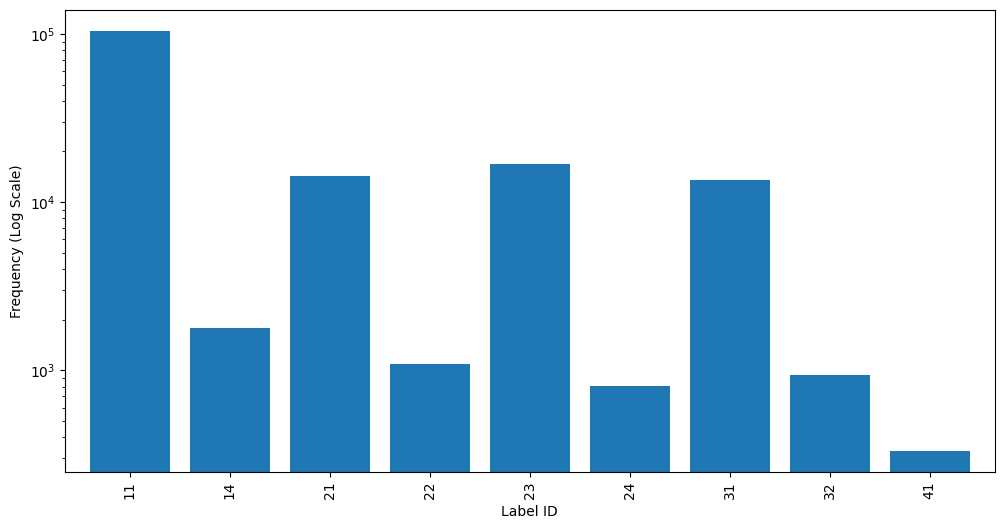

In [8]:
counts = subset.label_agg.value_counts().sort_index()

plt.figure(figsize=(12, 6))

# Add logy=True to force the Y-axis into log scale
counts.plot(kind='bar', width=0.8, logy=True)

plt.xlabel("Label ID")
plt.ylabel("Frequency (Log Scale)")
plt.show()

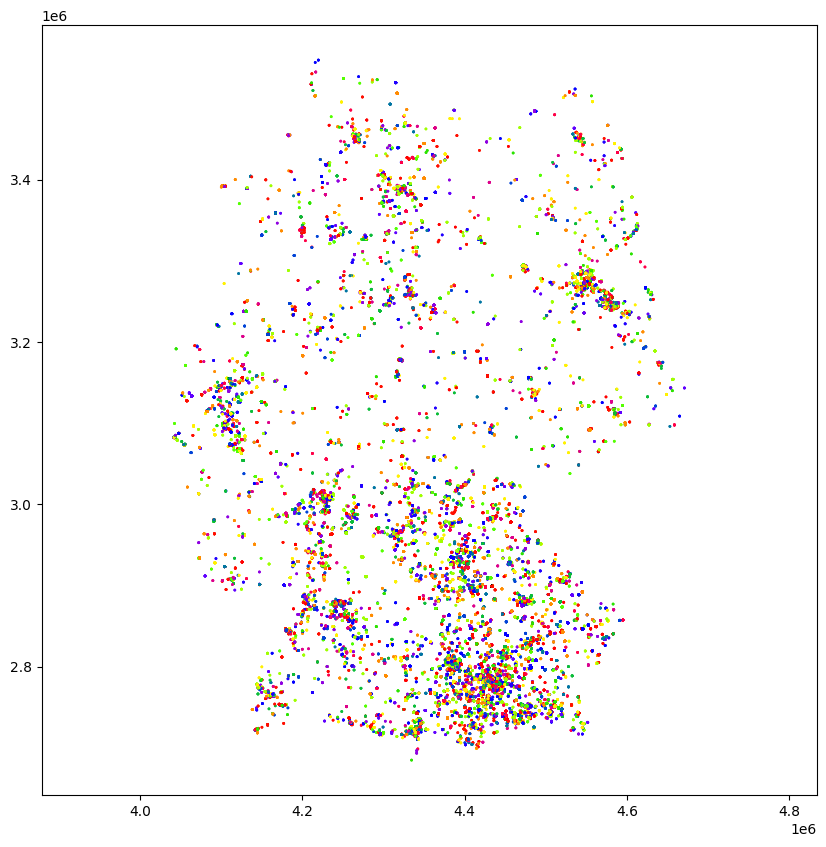

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(subset.X, subset.Y, c=subset.cell_id % 20, s=1, cmap='prism')

ax.set_aspect('equal', adjustable='datalim')

plt.show()

In [10]:
gdf = subset.copy()
# stratify_key
gdf['stratify_key'] = gdf['cell_id'].astype(str) + "_" + gdf['label_agg'].astype(str)

In [11]:
gdf

str_id  cut        id                         geometry  \
0       0_19068740    0  19068740  POINT (4045828.891 3079160.082)   
1       1_19068740    1  19068740  POINT (4045828.891 3079160.082)   
2       2_19068740    2  19068740  POINT (4045828.891 3079160.082)   
3       3_19068740    3  19068740  POINT (4045828.891 3079160.082)   
4       0_19096975    0  19096975  POINT (4054634.018 3073557.196)   
...            ...  ...       ...                              ...   
169345    1_367005    1    367005  POINT (4644240.694 3175045.755)   
169346    0_328587    0    328587  POINT (4639519.977 3174723.213)   
169347    1_328587    1    328587  POINT (4639519.977 3174723.213)   
169348    2_328587    2    328587  POINT (4639519.977 3174723.213)   
169349     0_96185    0     96185   POINT (4269889.46 3449080.557)   

                   X             Y  label  label_agg   cell_id stratify_key  
0       4.045829e+06  3.079160e+06    112         11  30599848  30599848_11  
1       4.045829e+06  3.079160e+06    112         11  30599848  30599848_11  
2       4.045829e+06  3.079160e+06    112         11  30599848  30599848_11  
3       4.045829e+06  3.079160e+06    112         11  30599848  30599848_11  
4       4.054634e+06  3.073557e+06    312         31  30958952  30958952_31  
...              ...           ...    ...        ...       ...          ...  
169345  4.644241e+06  3.175046e+06    312         31  24457683  24457683_31  
169346  4.639520e+06  3.174723e+06    313         31  24476869  24476869_31  
169347  4.639520e+06  3.174723e+06    313         31  24476869  24476869_31  
169348  4.639520e+06  3.174723e+06    313         31  24476869  24476869_31  
169349  4.269889e+06  3.449081e+06    311         31   6887799   6887799_31  

[153826 rows x 10 columns]

In [12]:
counts = gdf.groupby("stratify_key")["X"].count()
single_keys = counts[counts == 1].index
single_records = gdf.loc[gdf["stratify_key"].isin(single_keys)]
gdf = gdf.drop(index=single_records.index)


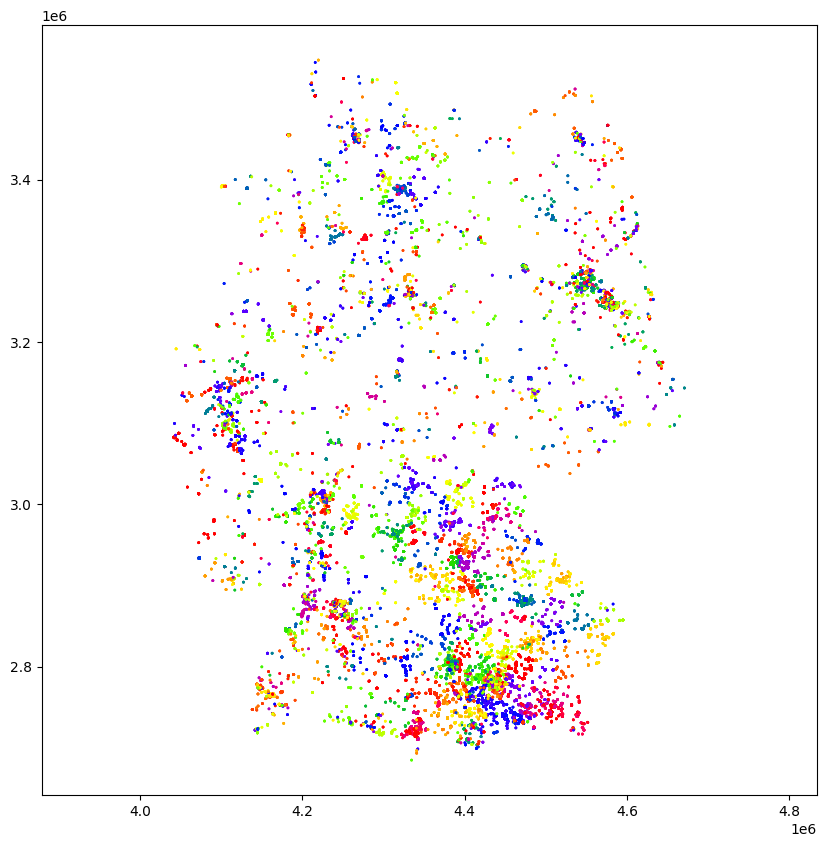

In [13]:
fig, ax = plt.subplots(figsize=(10, 10))
codes, uniques = pd.factorize(gdf.stratify_key)
counts = gdf.groupby("stratify_key")["X"].count()
single_keys = counts[counts == 1].index
mask = gdf["stratify_key"].isin(single_keys)
gdf['plot_color'] = gdf['stratify_key'].map(lambda x: 'black' if counts.get(x, default=0) == 1 else 'none')

ax.scatter(gdf.X, gdf.Y, c=codes, s=1, cmap='prism')

ax.scatter(gdf.X, gdf.Y, c=gdf.plot_color, s=mask.map({True : 60, False : 1}), 
    marker='x')

ax.set_aspect('equal', adjustable='datalim')

plt.show()

In [14]:
ger = gpd.read_file("geodata/1_sehr_hoch.geo.json")

In [15]:
ger

id                    name   type  \
0   DE-BW       Baden-Württemberg  State   
1   DE-BY                  Bayern  State   
2   DE-BE                  Berlin  State   
3   DE-BB             Brandenburg  State   
4   DE-HB                  Bremen  State   
5   DE-HH                 Hamburg  State   
6   DE-HE                  Hessen  State   
7   DE-MV  Mecklenburg-Vorpommern  State   
8   DE-NI           Niedersachsen  State   
9   DE-NW     Nordrhein-Westfalen  State   
10  DE-RP         Rheinland-Pfalz  State   
11  DE-SL                Saarland  State   
12  DE-ST          Sachsen-Anhalt  State   
13  DE-SN                 Sachsen  State   
14  DE-SH      Schleswig-Holstein  State   
15  DE-TH               Thüringen  State   

                                             geometry  
0   MULTIPOLYGON (((8.70837 47.71556, 8.70918 47.7...  
1   POLYGON ((10.13386 50.55, 10.1398 50.54252, 10...  
2   POLYGON ((13.16181 52.59442, 13.174 52.59425, ...  
3   POLYGON ((13.87951 53.50107, 13.87927 53.49908...  
4   POLYGON ((8.98545 53.12822, 8.97316 53.12799, ...  
5   POLYGON ((10.07162 53.71823, 10.0715 53.72192,...  
6   POLYGON ((9.49877 51.63152, 9.50474 51.62795, ...  
7   MULTIPOLYGON (((14.26472 53.71069, 14.26472 53...  
8   MULTIPOLYGON (((6.86528 53.59597, 6.86528 53.5...  
9   POLYGON ((8.66628 52.52528, 8.67277 52.51795, ...  
10  POLYGON ((7.79963 50.94302, 7.81179 50.93973, ...  
11  POLYGON ((7.03796 49.64338, 7.0559 49.63674, 7...  
12  POLYGON ((11.63251 53.01641, 11.63239 53.00897...  
13  POLYGON ((12.878 51.6727, 12.87185 51.6691, 12...  
14  MULTIPOLYGON (((8.68972 54.06681, 8.68972 54.0...  
15  POLYGON ((10.77189 51.64491, 10.78391 51.64098...

In [16]:
gdf = gdf.set_geometry(gdf.geometry)
gdf = gdf.set_crs("EPSG:3035")
ger = ger.to_crs("EPSG:3035")
geodf = gpd.sjoin(gdf, ger[['id', 'geometry']], how='left', predicate='intersects')

<Axes: >

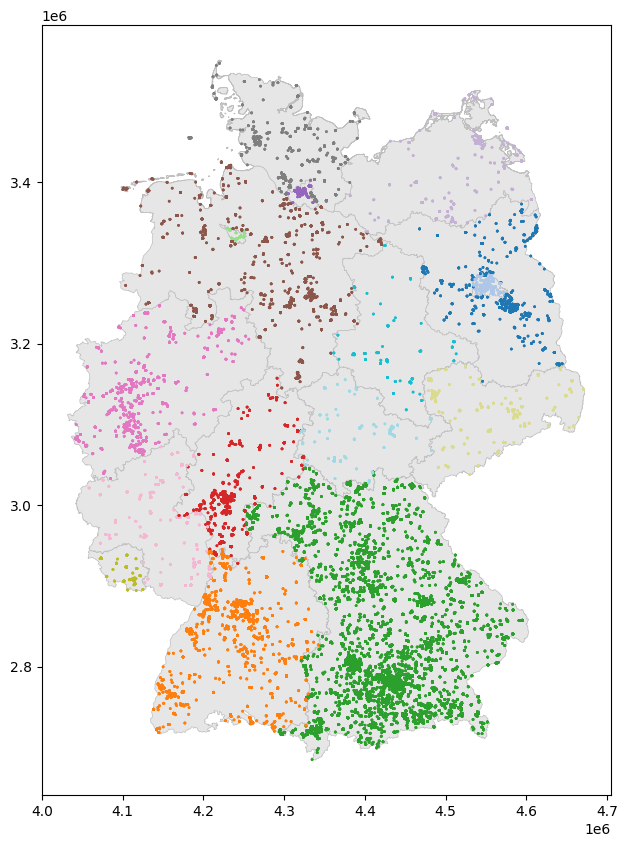

In [34]:
fig, ax = plt.subplots(figsize=(10, 10))
ger.plot(ax=ax, color=[.9,.9,.9], edgecolor=[.75,.75,.75], linewidth=0.5)
geodf.plot(ax=ax, markersize=1, column='id_right',cmap='tab20')

In [19]:
geodf.groupby("id_right")["X"].count()

id_right
DE-BB     3205
DE-BE     3351
DE-BW    12039
DE-BY    97959
DE-HB      375
DE-HE     6493
DE-HH     2500
DE-MV     1043
DE-NI     8768
DE-NW     9238
DE-RP     1655
DE-SH     2462
DE-SL     1454
DE-SN     1411
DE-ST      660
DE-TH      449
Name: X, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split

# Perform split
# 'train_size' is your desired sample percentage (e.g., 0.1 for 10%)
test_gdf, _ = train_test_split(
    geodf, 
    train_size=0.1, 
    stratify=gdf['stratify_key'],
    random_state=42
)

train_gdf = geodf.drop(index=test_gdf.index)

In [36]:
train_occs = train_gdf.groupby("label_agg").count()
train_occs["cut"] = train_occs["cut"] /sum(train_occs["cut"])
train_occs.rename(columns={"str_id":"count", "cut":"proportion"}, inplace=True)
train_occs.drop(columns=["Y", "geometry", "cell_id", "stratify_key", "X", "id_left", "id_right", "index_right","label", "plot_color"], inplace=True)

test_occs = test_gdf.groupby("label_agg").count()
test_occs["cut"] = test_occs["cut"] /sum(test_occs["cut"])
test_occs.rename(columns={"str_id":"count", "cut":"proportion"}, inplace=True)
test_occs.drop(columns=["Y", "geometry", "cell_id", "stratify_key", "X", "id_left", "id_right", "index_right","label", "plot_color"], inplace=True)


occ_frame = train_occs.join(test_occs, lsuffix="_train", rsuffix="_test")
occ_frame["delta"] = occ_frame["proportion_train"] - occ_frame["proportion_test"]
occ_frame

count_train  proportion_train  count_test  proportion_test  \
label_agg                                                               
11               93535          0.675621       10542         0.685347   
14                1614          0.011658         173         0.011247   
21               12932          0.093410        1402         0.091145   
22                 982          0.007093         114         0.007411   
23               15149          0.109424        1685         0.109544   
24                 732          0.005287          79         0.005136   
31               12340          0.089134        1272         0.082694   
32                 854          0.006169          89         0.005786   
41                 305          0.002203          26         0.001690   

              delta  
label_agg            
11        -0.009725  
14         0.000411  
21         0.002265  
22        -0.000318  
23        -0.000120  
24         0.000152  
31         0.006440  
32         0.000383  
41         0.000513

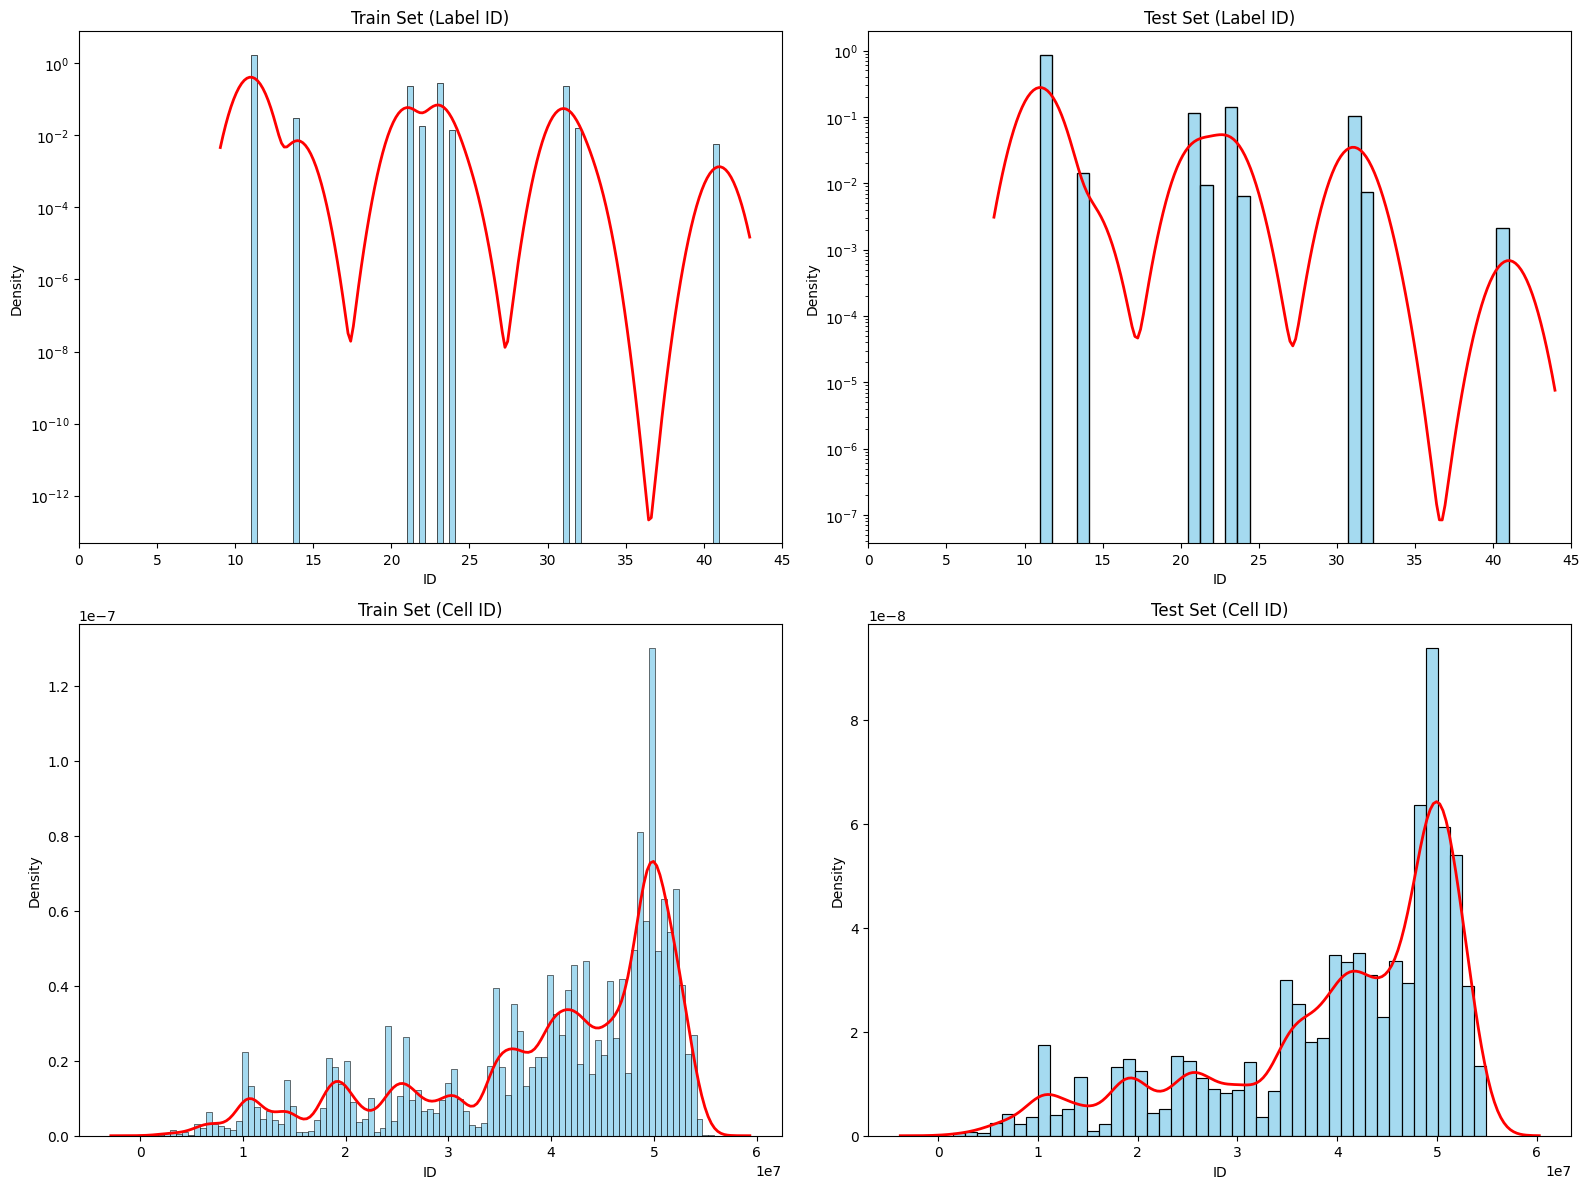

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(16, 12))

plot_data = [
    (train_gdf.label_agg, "Train Set (Label ID)", axs[0,0]),
    (test_gdf.label_agg, "Test Set (Label ID)", axs[0,1]),
    (train_gdf.cell_id, "Train Set (Cell ID)", axs[1,0]),
    (test_gdf.cell_id, "Test Set (Cell ID)", axs[1,1])
]

for data, title, ax in plot_data:
    sns.histplot(data, kde=False, ax=ax, stat="density", color="skyblue", element="bars")
    sns.kdeplot(data, ax=ax, color="red", linewidth=2)
    if ax in [axs[0,0], axs[0,1]]:
        ax.set_xlim(0, 45)
        ax.set_yscale('log')

    ax.set_title(title)
    ax.set_xlabel("ID")
    ax.set_ylabel("Density")

plt.tight_layout()
plt.show()

In [38]:
for index in gdf.index:
    gdf.loc[index, "plot_color"] = "red" if index in test_gdf.index else "blue"

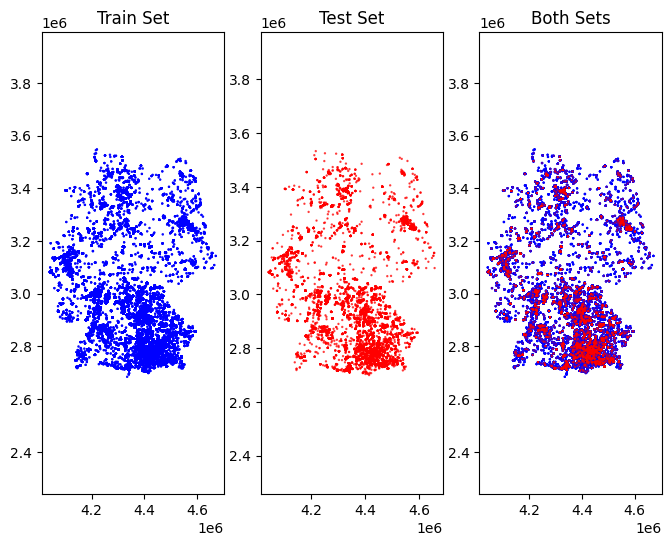

In [39]:
fig, ax = plt.subplots(1,3, figsize=(8, 6))
train_gdf.plot_color="blue"
test_gdf.plot_color="red"

ax[0].scatter(train_gdf.X, train_gdf.Y, c=train_gdf.plot_color, s=0.5, alpha=0.7)
ax[0].set_aspect('equal', adjustable='datalim')
ax[0].set_title("Train Set")

ax[1].scatter(test_gdf.X, test_gdf.Y, c=test_gdf.plot_color, s=0.5, alpha=0.7)
ax[1].set_aspect('equal', adjustable='datalim')
ax[1].set_title("Test Set")

ax[2].scatter(train_gdf.X, train_gdf.Y, c=train_gdf.plot_color, s=0.5, alpha=1)
ax[2].scatter(test_gdf.X, test_gdf.Y, c=test_gdf.plot_color, s=0.3, alpha=0.3, marker='x')
ax[2].set_aspect('equal', adjustable='datalim')
ax[2].set_title("Both Sets")

plt.show()

In [40]:
sdf = geodf.copy()
for index in sdf.index:
    sdf.loc[index, "dataset"] = "test" if index in test_gdf.index else "train"

In [41]:
sdf

str_id  cut   id_left                         geometry  \
0       0_19068740    0  19068740  POINT (4045828.891 3079160.082)   
1       1_19068740    1  19068740  POINT (4045828.891 3079160.082)   
2       2_19068740    2  19068740  POINT (4045828.891 3079160.082)   
3       3_19068740    3  19068740  POINT (4045828.891 3079160.082)   
4       0_19096975    0  19096975  POINT (4054634.018 3073557.196)   
...            ...  ...       ...                              ...   
169345    1_367005    1    367005  POINT (4644240.694 3175045.755)   
169346    0_328587    0    328587  POINT (4639519.977 3174723.213)   
169347    1_328587    1    328587  POINT (4639519.977 3174723.213)   
169348    2_328587    2    328587  POINT (4639519.977 3174723.213)   
169349     0_96185    0     96185   POINT (4269889.46 3449080.557)   

                   X             Y  label  label_agg   cell_id stratify_key  \
0       4.045829e+06  3.079160e+06    112         11  30599848  30599848_11   
1       4.045829e+06  3.079160e+06    112         11  30599848  30599848_11   
2       4.045829e+06  3.079160e+06    112         11  30599848  30599848_11   
3       4.045829e+06  3.079160e+06    112         11  30599848  30599848_11   
4       4.054634e+06  3.073557e+06    312         31  30958952  30958952_31   
...              ...           ...    ...        ...       ...          ...   
169345  4.644241e+06  3.175046e+06    312         31  24457683  24457683_31   
169346  4.639520e+06  3.174723e+06    313         31  24476869  24476869_31   
169347  4.639520e+06  3.174723e+06    313         31  24476869  24476869_31   
169348  4.639520e+06  3.174723e+06    313         31  24476869  24476869_31   
169349  4.269889e+06  3.449081e+06    311         31   6887799   6887799_31   

       plot_color  index_right id_right dataset  
0            none          9.0    DE-NW   train  
1            none          9.0    DE-NW   train  
2            none          9.0    DE-NW   train  
3            none          9.0    DE-NW    test  
4            none          9.0    DE-NW   train  
...           ...          ...      ...     ...  
169345       none          3.0    DE-BB   train  
169346       none          3.0    DE-BB   train  
169347       none          3.0    DE-BB   train  
169348       none          3.0    DE-BB   train  
169349       none         14.0    DE-SH   train  

[153825 rows x 14 columns]

In [712]:
sankey_frame = sdf.loc[:,["dataset", "id_right", "label_agg"]]
sankey_frame = sankey_frame.dropna()
sankey_frame = sankey_frame.sample(frac=1).reset_index(drop=True)
sankey_frame['count'] = 1

In [744]:
label_map = {11:"Urban",
 14:"Parks",
 21:"Arable land",
 22:"Permanent crops",
 23:"Pastures", 
 24:"Agriculture",
 31:"Forest",
 32:"Shrub",
 41:"Wetlands"
 }
sankey_frame['label_str'] = sankey_frame['label_agg'].map(label_map)

In [88]:
import plotly.graph_objects as go

In [614]:
color_link = ["#FF0000","#00FF00", '#FFFFFF', "#e2382a", "#F9C700", # Train | Test | Brandenburg |  ### Test Berlin | BW | 
             '#0098d4', '#1D9053', "#5F009F", "#797979", '#2b58a3', # Bayern | Bremen | Hessen | Hamburg | MV |
             '#0000A6', '#63FFAC', '#B79762', '#004D43', '#8FB0FF', # Niedersachsen | NRW | RP | SH | Saarland |
             '#166c28', '#404040', '#0094cb', '#BFBFBF', "#A92A20", # Sachsen | Sachsen-Anhalt | Thüringen | ### Train Brandenburg | Berlin |
             "#BA9500", '#00729F', '#166C3E', "#470077", "#5B5B5B", # | BW | Bayern | Bremen | Hessen | Hamburg |
             '#20427A', '#00007D', '#4ABF81', '#89714A', '#003A32', # | MV | Niedersachsen | NRW | RP | SH |
             '#6B84BF', '#11511E', '#000000', '#006F98',              # Saarland | Sachsen | Sachsen-Anhalt | Thüringen |
             
             # Test dataset labels
             '#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFFFFF', # BB | BB | BB | BB | BB | BB |
             '#FFFFFF', '#FFFFFF', '#FFFFFF', "#e2382a", "#e2382a", # BB | BB | BB | BE | BE |
             "#e2382a", "#e2382a", "#e2382a", "#e2382a", "#e2382a", # BE | BE | BE | BE | BE |
             "#e2382a", "#e2382a", "#F9C700", "#F9C700", "#F9C700", # BE | BE | BW | BW | BW |
             "#F9C700", "#F9C700", "#F9C700", "#F9C700", "#F9C700", # BW | BW | BW | BW | BW |
             "#F9C700", '#0098d4', '#0098d4', '#0098d4', '#0098d4', # BW | BY | BY | BY | BY |
             '#0098d4', '#0098d4', '#0098d4', '#0098d4', '#0098d4', # BY | BY | BY | BY | BY |
             '#1D9053', '#1D9053', '#1D9053', '#1D9053', '#1D9053', # HB | HB | HB | HB | HB |
             '#1D9053', '#1D9053', '#1D9053', '#1D9053', "#5F009F", # HB | HB | HB | HB | HE |
             "#5F009F", "#5F009F", "#5F009F", "#5F009F", "#5F009F", # HE | HE | HE | HE | HE |
             "#5F009F", "#5F009F", "#5F009F", "#797979", "#797979", # HE | HE | HE | HH | HH | 
             "#797979", "#797979", "#797979", "#797979", "#797979", # HH | HH | HH | HH | HH |
             "#797979", "#797979", '#2b58a3', '#2b58a3', '#2b58a3', # HH | HH | MV | MV | MV |
             '#2b58a3', '#2b58a3', '#2b58a3', '#2b58a3', '#2b58a3', # MV | MV | MV | MV | MV |
             '#2b58a3', '#0000A6', '#0000A6', '#0000A6', '#0000A6', # MV | NI | NI | NI | NI |
             '#0000A6', '#0000A6', '#0000A6', '#0000A6', '#0000A6', # NI | NI | NI | NI | NI |
             '#63FFAC', '#63FFAC', '#63FFAC', '#63FFAC', '#63FFAC', # NR | NR | NR | NR | NR |
             '#63FFAC', '#63FFAC', '#63FFAC', '#63FFAC', '#B79762', # NR | NR | NR | NR | RP |
             '#B79762', '#B79762', '#B79762', '#B79762', '#B79762', # RP | RP | RP | RP | RP |
             '#B79762', '#B79762', '#B79762', '#004D43', '#004D43', # RP | RP | RP | SH | SH |
             '#004D43', '#004D43', '#004D43', '#004D43', '#004D43', # SH | SH | SH | SH | SH |
             '#004D43', '#004D43', '#8FB0FF', '#8FB0FF', '#8FB0FF', # SH | SH | SL | SL | SL |
             '#8FB0FF', '#8FB0FF', '#8FB0FF', '#8FB0FF', '#8FB0FF', # SL | SL | SL | SL | SL |
             '#8FB0FF', '#166c28', '#166c28', '#166c28', '#166c28', # SL | SL | SL | SN | SN |
             '#166c28', '#166c28', '#166c28', '#166c28', '#166c28', # SN | SN | SN | SN | SN |
             '#404040', '#404040', '#404040', '#404040', '#404040', # SN | SN | ST | ST | ST | (25% Lightened)
             '#404040', '#404040', '#404040', '#404040', '#0094cb', # ST | ST | ST | ST | ST |
             '#0094cb', '#0094cb', '#0094cb', '#0094cb', '#0094cb', # ST | TH | TH | TH | TH |
             '#0094cb', '#0094cb', '#0094cb',                      # TH | TH | TH |
             
             # Train dataset labels
             '#BFBFBF', '#BFBFBF', '#BFBFBF', '#BFBFBF', '#BFBFBF', '#BFBFBF', # BB | BB | BB | BB | BB | BB |
             '#BFBFBF', '#BFBFBF', '#BFBFBF', "#A92A20", "#A92A20", # BB | BB | BB | BE | BE |
             "#A92A20", "#A92A20", "#A92A20", "#A92A20", "#A92A20", # BE | BE | BE | BE | BE |
             "#A92A20", "#A92A20", "#BA9500", "#BA9500", "#BA9500", # BE | BE | BW | BW | BW |
             "#BA9500", "#BA9500", "#BA9500", "#BA9500", "#BA9500", # BW | BW | BW | BW | BW |
             "#BA9500", '#00729F', '#00729F', '#00729F', '#00729F', # BW | BY | BY | BY | BY |
             '#00729F', '#00729F', '#00729F', '#00729F', '#00729F', # BY | BY | BY | BY | BY |
             '#166C3E', '#166C3E', '#166C3E', '#166C3E', '#166C3E', # HB | HB | HB | HB | HB |
             '#166C3E', '#166C3E', '#166C3E', '#166C3E', "#470077", # HB | HB | HB | HB | HE |
             "#470077", "#470077", "#470077", "#470077", "#470077", # HE | HE | HE | HE | HE |
             "#470077", "#470077", "#470077", "#5B5B5B", "#5B5B5B", # HE | HE | HE | HH | HH | 
             "#5B5B5B", "#5B5B5B", "#5B5B5B", "#5B5B5B", "#5B5B5B", # HH | HH | HH | HH | HH |
             "#5B5B5B", "#5B5B5B", '#20427A', '#20427A', '#20427A', # HH | HH | MV | MV | MV |
             '#20427A', '#20427A', '#20427A', '#20427A', '#20427A', # MV | MV | MV | MV | MV |
             '#20427A', '#00007D', '#00007D', '#00007D', '#00007D', # MV | NI | NI | NI | NI |
             '#00007D', '#00007D', '#00007D', '#00007D', '#00007D', # NI | NI | NI | NI | NI |
             '#4ABF81', '#4ABF81', '#4ABF81', '#4ABF81', '#4ABF81', # NR | NR | NR | NR | NR |
             '#4ABF81', '#4ABF81', '#4ABF81', '#4ABF81', '#89714A', # NR | NR | NR | NR | RP |
             '#89714A', '#89714A', '#89714A', '#89714A', '#89714A', # RP | RP | RP | RP | RP |
             '#89714A', '#89714A', '#89714A', '#003A32', '#003A32', # RP | RP | RP | SH | SH |
             '#003A32', '#003A32', '#003A32', '#003A32', '#003A32', # SH | SH | SH | SH | SH |
             '#003A32', '#003A32', '#6B84BF', '#6B84BF', '#6B84BF', # SH | SH | SL | SL | SL |
             '#6B84BF', '#6B84BF', '#6B84BF', '#6B84BF', '#6B84BF', # SL | SL | SL | SL | SL |
             '#6B84BF', '#11511E', '#11511E', '#11511E', '#11511E', # SL | SL | SL | SN | SN |
             '#11511E', '#11511E', '#11511E', '#11511E', '#11511E', # SN | SN | SN | SN | SN |
             '#000000', '#000000', '#000000', '#000000', '#000000', # SN | SN | ST | ST | ST |
             '#000000', '#000000', '#000000', '#000000', '#006F98', # ST | ST | ST | ST | ST |
             '#006F98', '#006F98', '#006F98', '#006F98', '#006F98', # ST | TH | TH | TH | TH |
             '#006F98', '#006F98', '#006F98',                      # TH | TH | TH |
             ]

In [856]:
top = ['Whole dataset']
datas = sorted(sankey_frame.dataset.unique())
bl = sorted(sankey_frame.id_right.unique())
# lab = sorted(sankey_frame.label_agg.unique())
lab = sankey_frame.sort_values("label_agg").label_str.unique()

# label = [[top], [datas], [bl], [lab]]
# label_flat = np.concatenate([top, datas, bl, lab])
label = [[top], [datas], [bl], [np.concatenate([lab, [l+"_tr" for l in lab]])]]
label_flat = np.concatenate([top, datas, bl, lab, np.concatenate([lab, [l+"_tr" for l in lab]])])
label_len = [len(top), len(datas), len(bl), len(lab)]

In [868]:
source, target = [], []
bl_source, bl_target = [], []

for idx, labels in enumerate(label[:len(label_len)-1]):
    print(idx, labels[0])
    for id, item in enumerate(labels[0]):
        print(id, item)
        for count in range(label_len[idx+1]):
            print(item)
            if idx == 2:
                bl_source.append(item)
            else:
                source.append(item)
        for la in label[idx+1]:
            if idx == 2:
                bl_target.append(la)
            else:
                # if item=="train":
                    # la = [l+"_tr" for l in la]   
                target.append(la)
    if idx == 2:
        for i in range(2):
            print(i)
            # if i ==1:
            #     bl_source = [bs+"_tr" for bs in bl_source]
            #     bl_target = [bt+"_tr" for bt in bl_target]
            source.extend(bl_source)
            target.extend(bl_target)
            

source = np.array(source)

target = np.concatenate(target)
target = np.array(target)

code_source, unique_source = pd.factorize(source)
code_target, unique_target = pd.factorize(target)
code_target+=1

0 ['Whole dataset']
0 Whole dataset
Whole dataset
Whole dataset
1 ['test', 'train']
0 test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
test
1 train
train
train
train
train
train
train
train
train
train
train
train
train
train
train
train
train
2 ['DE-BB', 'DE-BE', 'DE-BW', 'DE-BY', 'DE-HB', 'DE-HE', 'DE-HH', 'DE-MV', 'DE-NI', 'DE-NW', 'DE-RP', 'DE-SH', 'DE-SL', 'DE-SN', 'DE-ST', 'DE-TH']
0 DE-BB
DE-BB
DE-BB
DE-BB
DE-BB
DE-BB
DE-BB
DE-BB
DE-BB
DE-BB
1 DE-BE
DE-BE
DE-BE
DE-BE
DE-BE
DE-BE
DE-BE
DE-BE
DE-BE
DE-BE
2 DE-BW
DE-BW
DE-BW
DE-BW
DE-BW
DE-BW
DE-BW
DE-BW
DE-BW
DE-BW
3 DE-BY
DE-BY
DE-BY
DE-BY
DE-BY
DE-BY
DE-BY
DE-BY
DE-BY
DE-BY
4 DE-HB
DE-HB
DE-HB
DE-HB
DE-HB
DE-HB
DE-HB
DE-HB
DE-HB
DE-HB
5 DE-HE
DE-HE
DE-HE
DE-HE
DE-HE
DE-HE
DE-HE
DE-HE
DE-HE
DE-HE
6 DE-HH
DE-HH
DE-HH
DE-HH
DE-HH
DE-HH
DE-HH
DE-HH
DE-HH
DE-HH
7 DE-MV
DE-MV
DE-MV
DE-MV
DE-MV
DE-MV
DE-MV
DE-MV
DE-MV
DE-MV
8 DE-NI
DE-NI
DE-NI
DE-NI
DE-NI
DE-NI
DE-NI
DE-NI
DE-NI
DE-NI
9 DE-NW
DE-NW
DE-NW


In [869]:
dval = sankey_frame.groupby("dataset")["count"].count().values

dteval = sankey_frame[sankey_frame.dataset == "test"].groupby("id_right")["count"].count().values

dtrval = sankey_frame[sankey_frame.dataset == "train"].groupby("id_right")["count"].count().values

pivot_counts = (sankey_frame[sankey_frame.dataset == "test"]
                .pivot_table(index="id_right", 
                            #  columns="label_agg", 
                             columns ="label_str",
                             values="count", 
                             aggfunc="count", 
                             fill_value=0))

btearr = pivot_counts.reindex(index=bl, columns=lab, fill_value=0).values

pivot_counts = (sankey_frame[sankey_frame.dataset == "train"]
                .pivot_table(index="id_right", 
                            #  columns="label_agg", 
                             columns ="label_str",
                             values="count", 
                             aggfunc="count", 
                             fill_value=0))

btrarr = pivot_counts.reindex(index=bl, columns=lab, fill_value=0).values


value = np.concatenate([dval, dteval, dtrval, btearr.flatten(), btrarr.flatten()])

In [870]:
link = dict(source=code_source, target=code_target, value=value, color=color_link)
# node handels assigning labels and the housekeeping aound the diagram.
node = dict(label = label_flat, pad=35, thickness=20, color = "goldenrod")
# We then package the informtion into our data object
data = go.Sankey(link=link, node=node, arrangement = "snap")

In [871]:
fig = go.Figure(data)
fig.update_layout(
    hovermode='x',
    title='Data Distribution: Train/Test by Region and Label',
    font=dict(size=12, color='white'),
    paper_bgcolor='#222222',
    plot_bgcolor='#222222',
    height=1200,  # Increase height to spread out the labels
    margin=dict(l=50, r=50, t=50, b=50), 
)
fig.show()

In [53]:
import plotly.express as px

In [85]:
import plotly.express as px

fig = px.treemap(
    sankey_frame, 
    path=[px.Constant("Dataset"), 'dataset', 'id_right', 'label_agg'], 
    values='count', 
    color_continuous_scale='RdBu_r',
    color='label_agg',
    hover_data=['count']
)

# This line forces the text to display the Label + the Value (count)
fig.update_traces(textinfo="label+value")

fig.update_layout(margin=dict(t=50, l=25, r=25, b=25),
                   height = 450, width = 800)
fig.show()

In [121]:
test_gdf.stratify_key.max()

'99631_31'

In [122]:
train_gdf.stratify_key.max()

'9978279_31'

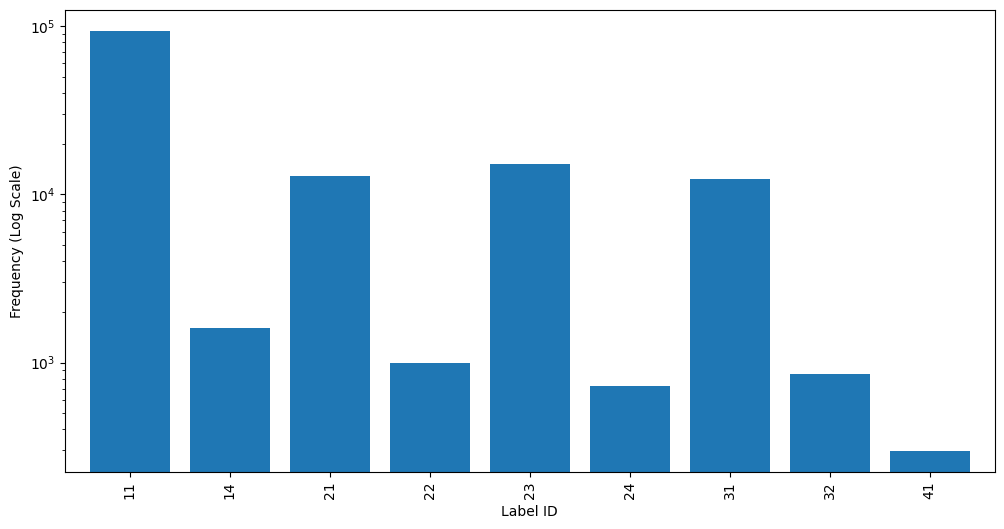

In [ ]:
counts = train_gdf.label_agg.value_counts().sort_index()
counts.plot(kind='bar', width=0.8, logy=True)

plt.figure(figsize=(12, 6))

# Add logy=True to force the Y-axis into log scale
counts.plot(kind='bar', width=0.8, logy=True)

plt.xlabel("Label ID")
plt.ylabel("Frequency (Log Scale)")
plt.show()

In [28]:
import evidently

In [52]:
def map_to_def(dataFrame: pd.DataFrame, id_col: str, timestamp_col: str = None):
    """
    Processes a DataFrame to identify column types and prepares a DataDefinition for Evidently.
    """
    df = dataFrame.copy()
    df.columns = df.columns.astype(str)

    datetime_cols = []
    column_mapping = {}
    
    # Explicitly handle the designated timestamp column
    if timestamp_col and timestamp_col in df.columns:
        print(f"Column '{timestamp_col}' designated as timestamp. Converting.")
        df[timestamp_col] = pd.to_datetime(df[timestamp_col], errors='coerce')
        datetime_cols.append(timestamp_col)

    # Identify numerical and categorical columns
    numerical_cols = df.select_dtypes(include=np.number).columns.to_list()
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.to_list()

    # Remove ID and timestamp from lists as they are special columns
    if id_col in numerical_cols:
        numerical_cols.remove(id_col)
    if timestamp_col and timestamp_col in numerical_cols:
         numerical_cols.remove(timestamp_col)
         
    if id_col in categorical_cols:
        categorical_cols.remove(id_col)
    if timestamp_col and timestamp_col in categorical_cols:
        categorical_cols.remove(timestamp_col)

    # Auto-detect other potential datetime columns from remaining categorical columns
    remaining_cat = categorical_cols[:]
    for col in remaining_cat:
        # Skip the already processed timestamp column
        if col == timestamp_col:
            continue
        try:
            # Attempt to convert a sample to see if it's a datetime column
            pd.to_datetime(df[col].dropna().iloc[:10], errors='raise')
            print(f"Column '{col}' auto-detected as datetime. Converting entire column.")
            df[col] = pd.to_datetime(df[col], errors='coerce')
            datetime_cols.append(col)
            categorical_cols.remove(col)
        except (ValueError, TypeError):
            # Not a datetime column, so we pass
            pass
    
    print("\n--- Column Classification ---")
    print(f"ID Column: {id_col}")
    print(f"Timestamp Column: {timestamp_col}")
    print(f"Numerical Columns: {numerical_cols}")
    print(f"Categorical Columns: {categorical_cols}")
    print(f"Datetime Columns: {datetime_cols}")
    print("---------------------------\n")

    for col in numerical_cols:
        column_mapping[col] = evidently.utils.data_preprocessing.ColumnDefinition(column_name=col, column_type="num")

    for col in categorical_cols:
        column_mapping[col] = evidently.utils.data_preprocessing.ColumnDefinition(column_name=col, column_type="cat")        

    if id_col:
        column_mapping[id_col] = evidently.utils.data_preprocessing.ColumnDefinition(column_name=id_col, column_type="id")

    return df, numerical_cols, categorical_cols, id_col

In [36]:
from evidently.utils.data_preprocessing import DataDefinition

In [53]:
a_processed, a_num, a_cat, a_id = map_to_def(train_gdf, id_col="str_id")
b_processed, b_num, b_cat, b_id = map_to_def(test_gdf, id_col="str_id")


--- Column Classification ---
ID Column: str_id
Timestamp Column: None
Numerical Columns: ['cut', 'id', 'X', 'Y', 'label', 'label_agg', 'cell_id']
Categorical Columns: ['stratify_key', 'plot_color']
Datetime Columns: []
---------------------------


--- Column Classification ---
ID Column: str_id
Timestamp Column: None
Numerical Columns: ['cut', 'id', 'X', 'Y', 'label', 'label_agg', 'cell_id']
Categorical Columns: ['stratify_key', 'plot_color']
Datetime Columns: []
---------------------------



C:\Users\mfher\AppData\Local\Temp\ipykernel_32092\1708304846.py:40: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\mfher\AppData\Local\Temp\ipykernel_32092\1708304846.py:40: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\mfher\AppData\Local\Temp\ipykernel_32092\1708304846.py:40: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\mfher\AppData\Local\Temp\ipykernel_32092\1708304846.py:40: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please spe

In [54]:
from evidently import ColumnMapping
from evidently.report import Report
from evidently.metric_preset import DataDriftPreset

# 1. Prepare your ColumnMapping (replaces map_to_def and Dataset)
mapping = ColumnMapping()
mapping.id = "str_id"
mapping.numerical_features = a_num    # Your existing list of numeric names
mapping.categorical_features = a_cat # Your existing list of category names
# mapping.datetime = "your_date_column"        # Optional

# 2. Use your Pandas DataFrames directly in the Report
report = Report(metrics=[
    DataDriftPreset(), 
])

# Pass the DataFrames (a_processed, b_processed) and the mapping directly
report.run(
    reference_data=a_processed, 
    current_data=b_processed, 
    column_mapping=mapping
)

# 3. View the results
report.show(mode='inline')

In [ ]:
report = Report([
    DataDriftPreset(method="wasserstein")
],
include_tests="True")

In [1]:
from concurrent.futures import ThreadPoolExecutor
import math
from multiprocessing.util import get_logger
import ffmpeg
from functools import partial
import geopandas as gpd
import getpass
import io
import noisereduce as nr
import numpy as np
import os
import pandas as pd
import paramiko
from pathlib import Path, PurePath
import random
import re
import threading
import time
from torchaudio.functional import add_noise
import torch
import torch.nn.functional as F
import torchaudio.functional as AF
import torchaudio.transforms as T
import tqdm
os.environ["PYTORCH_ALLOC_CONF"] = "expandable_segments:True"

thread_local = threading.local()
pool = None

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

def to_device(data, device : str):
    """
        Moves tensors or models (pytorch data) to chosen device.

        Inputs:
            data - the pytorch data to be moved to the specified device

        Output:
            data - the data moved to the specified device
    """
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class SFTPConnectionPool:
    def __init__(self, host, port, username, password):
        self.host = host
        self.port = port
        self.username = username
        self.password = password
        self.thread_local = threading.local()

    def _create_client(self):
        # Increased window size for faster data transfer
        time.sleep(random.uniform(0, 8))
        transport = paramiko.Transport((self.host, self.port))
        transport.set_keepalive(30)
        transport.default_window_size = 2147483647
        transport.packetizer.REKEY_BYTES = pow(2, 40)
        transport.packetizer.REKEY_PACKETS = pow(2, 40)
        transport.window_size = 2147483647 
        transport.packet_size = 32768
        transport.connect(
            username=self.username, 
            password=self.password,
            gss_auth=False,      # Disable Kerberos
            gss_kex=False        # Disable Kerberos Key Exchange
        )
        # transport.connect(username=self.username, password=self.password)
        sftp = paramiko.SFTPClient.from_transport(transport)
        # Pre-set the working directory once per connection
        try:
            sftp.chdir("/lsdf01/lsdf/kit/ipf/projects/Bio-O-Ton/Audio_data")
        except:
            pass
        return sftp, transport
    

    def get_client(self):
        if not hasattr(self.thread_local, "sftp") or self.thread_local.transport is None or not self.thread_local.transport.is_active():
            time.sleep(random.uniform(0, 8))
            self.thread_local.sftp, self.thread_local.transport = self._create_client()
        return self.thread_local.sftp

        
# Augmentation functions
def selectSubset(frame, wanted_classes):
    """
    Selects a subset of a dataframe according to given class labels.

    Input:
        frame - the dataframe to be transformed, must include a "label" column
        wanted_classes - the classes to select

    Output: 
        frame - a dataframe containing only the rows that have the given class labels
    """
    wanted_indices = []
    for cl in wanted_classes:
        indices = []
        for idx, st in enumerate(frame["label"]):
            indices.append(str(st).startswith(cl))
        wanted_indices.append(indices)

    return frame.loc[np.any(wanted_indices, axis=0)]

def add_white_noise(signal, snr = 30):
    """
        snr: in db, use ~ 30 for low noise
    """
    signal = signal.unsqueeze(0)
    noise = to_device(torch.randn_like(signal), device)

    noisy_signal = add_noise(signal, noise, to_device(torch.tensor([snr]), device))
    
    return noisy_signal

def random_volume_change(signal, sampling_rate : int = 16000, pct : float = 0.1, seconds : float = 1.0):
    """
        Increases / decreases the volume of random parts of a signal.

        Input:
            signal - the signal to be processed
            sampling_rate : int - sampling rate of the signal
            pct : float - percentage of the signal to be affected
            seconds : float - duration of affected change per occurence

        Output:
            tensor - tensor with changed volume
    """
    clone = signal.clone()
    sig_len = signal.shape[-1]
    
    window_size = int(sampling_rate * seconds)
    
    num_iterations = int((sig_len * pct) / window_size)
    
    # Ensure signal is long enough
    num_iterations = max(num_iterations, 1) if pct > 0 else 0

    for i in range(num_iterations):

        if sig_len > window_size:
            cut_idx = np.random.randint(0, sig_len - window_size)

            clone[..., cut_idx : cut_idx + window_size] *= 7
            
    return clone


def random_cutout(signal, pct :float = .15, **kwargs):
    """
        Adds random grain to the signal.

        Input:
            signal - the signal to be processed
            pct : percentage of the signal to be made grainy

        Output:
            tensor - tensor with grain effect
    """
    copy = signal.clone()
    # sig_len = signal.shape[0]
    # sigs_to_cut = int(sig_len * pct)
    # for i in range(0, sigs_to_cut):
    #     cut_idx = random.randint(0, sig_len - 1)
    #     copy[cut_idx] = 0
    # return copy
    mask = torch.rand(signal.shape, device=signal.device) > pct
    return copy * mask


def pitch_warp(signal, sr : int = 16000, sr_divisor : float = 2.0, **kwargs):
    """
       Performs lossy sampling on a signal.

        Input:
            signal - the signal to be processed
            sr : int - sampling rate of the original signal
            sr_divisor - proportion of the sampling

        Output:
            tensor - lossily sampled tensor
    """
    # down_sr = sr // sr_divisor
    # resample_down = T.Resample(orig_freq=sr, new_freq=down_sr).to(signal.device, signal.dtype)
    # resample_up = T.Resample(orig_freq=down_sr, new_freq=sr).to(signal.device, signal.dtype)
    # return resample_up(resample_down(signal))
    down_sr = int(sr // sr_divisor)
    # Move the resampling kernel to the GPU
    resample_down = T.Resample(orig_freq=sr, new_freq=down_sr).to(signal.device, signal.dtype)
    resample_up = T.Resample(orig_freq=down_sr, new_freq=sr).to(signal.device, signal.dtype)
    return resample_up(resample_down(signal))


def random_timeshift(signal):
    """
        Cuts up a signal at random places and rearranges them.

        Input:
            signal - the signal to be processed

        Output:
            tensor - tensor with changed signal places
    """
    # max = len(signal)
    # borders = np.sort(np.random.rand(2))

    # floor = np.floor(max*borders[0]).astype(int)
    # ceil = np.floor(max*borders[1]).astype(int)

    # shifted = torch.cat([signal[floor:ceil], signal[:floor], signal[ceil:]])

    # return shifted
    shift = torch.randint(0, signal.shape[-1], (1,)).item()
    return torch.roll(signal, shifts=shift, dims=-1)


def vertical_blackout(signal, pct : float = 0.1):
    """
        Blacks out the vertical portion of the spectrogram by applying a transformation to a signal.

        Input:
            signal - the signal to be processed
            pct : float - percentage of the signal to be blacked out

        Output:
            tensor - tensor with vertical blackout
    """
    m = len(signal)
    border = torch.rand(1, device=signal.device).item() #np.sort(np.random.rand(1))[0]
    
    # floor = np.floor(m*border).astype(int)
    # ceil = np.floor(m*(border+pct)).astype(int)

    floor = int(m * border)
    ceil = int(m * (border + pct))

    csignal = signal.clone()
    csignal[floor:ceil] = 0

    return csignal

import numpy as np
import torch
from scipy.signal import lfilter as scipy_lfilter

def horizontal_blackout(signal, sample_rate, center_freq, pct=.05):
    """
        Blacks out the vertical portion of the spectrogram by applying a transformation to a signal.

        Input:
            signal - the signal to be processed
            sample_rate - sample rate of the signal
            center_freq - frequency for the bandpass filter
            pct : float - part of the signal to be blacked out

        Output:
            tensor - tensor with horizontal blackout
    """
    center_freq = (torch.rand(1, device=signal.device) * (1.0 - 0.15) + 0.15).item() * center_freq

    nyquist = sample_rate / 2
    bandwidth = nyquist * pct

    Q = center_freq / max(bandwidth, 1e-6)
    # 1. Move to CPU and convert to Numpy
    device = signal.device
    orig_dtype = signal.dtype
    sig_cpu = signal.detach().cpu().numpy()
    
    # 2. Manual Coefficient Calculation (Digital Biquad)
    w0 = 2 * np.pi * center_freq / sample_rate
    alpha = np.sin(w0) / (2 * Q)
    
    # Bandpass coefficients
    b = np.array([alpha, 0, -alpha])
    a = np.array([1 + alpha, -2 * np.cos(w0), 1 - alpha])
    
    # 3. Apply the filter
    # SciPy's lfilter is extremely stable for 1D arrays
    filtered_cpu = scipy_lfilter(b, a, sig_cpu)
    
    # 4. Bring back to Torch
    return signal - torch.from_numpy(filtered_cpu.astype(np.float32)).to(device).to(orig_dtype)


def cut_off_edge(signal):
    """
        Cuts the left / right edge off a signal.

        Input:
            signal - the signal to be processed

        Output:
            tensor - tensor with cut off edge
    """
    coin_flip = torch.randint(0, 2, (1,)).item()

    clone = to_device(torch.zeros_like(signal), device)
    offset = 16000 * 2 # 2 seconds

    if coin_flip == 0:
        # Move right part to the left
        clone[..., :-offset] = signal[..., offset:]
    else: 
        # Move left part to the right
        clone[..., offset:] = signal[..., :-offset]

    return clone


# Main processing function
def augment_data_record(file_path, output_dir, pool):
    tasks = [
            (add_white_noise, "wn", {"snr": 60}),
            (random_volume_change, "vc", {"pct": .15}),
            (random_cutout, "rc", {"pct": .00025}),
            (pitch_warp, "pw", {"sr_divisor": 1.15}),
            (random_timeshift, "rt", {}),
            (vertical_blackout, "vb", {}),
            (horizontal_blackout, "hb", {"sample_rate": 16000, "center_freq": 8000, "pct": 5}),
            (cut_off_edge, "ce", {})
        ]
    sftp = pool.get_client()
    try: 
        buffer = io.BytesIO()
        sftp.getfo(str(file_path).replace("\\", "/"), buffer)
        buffer.seek(0)
        wave = torch.load(buffer, map_location='cpu').to(device).to(torch.float16)

        buffers = {}
        for fun, suf, kwargs in tasks:
            aug_tensor = fun(wave, **kwargs)
            
            buf = io.BytesIO()
            torch.save(aug_tensor.to("cpu"), buf)
            buf.seek(0)
            
            buffers[f"{suf}_{file_path.stem}.pt"] = buf
            del aug_tensor
        del wave

        cwd = sftp.getcwd() 
        for filename, buf in buffers.items():
            remote_path = f"{cwd}/{output_dir}/{filename}".replace("\\", "/")

            with sftp.open(remote_path, 'wb', bufsize=1024*1024) as f:
                f.set_pipelined(True)
                # Ensure buffer is at the start before reading
                buf.seek(0)
                f.write(buf.getbuffer())
            
            buf.close()
        print("Saved files.")
            
        return True

    except Exception as e:
        if hasattr(pool.thread_local, "transport"):
            pool.thread_local.transport = None
        print(f"Error: {str(file_path)} -> {str(e)}")
        torch.cuda.empty_cache()
        return False

Using cuda device


In [2]:
host = 'os-login.lsdf.kit.edu'
port = 22

username = input("Enter username: ") or "uyrra"
password = getpass.getpass("Enter password: ")

pool = SFTPConnectionPool(host, port, username , password)

main_sftp = pool.get_client()
# main_sftp.chdir(".")
print(main_sftp.getcwd())

output_dir = "Augmented_data_denoised_cut"

try:
    main_sftp.mkdir(output_dir)
except IOError:
    print(f"Directory '{output_dir}' already exists.")
    pass

dawn_dir = PurePath("Dawn_denoised_cut")
xeno_dir = PurePath("XenoCanto_denoised_cut")

/lsdf01/lsdf/kit/ipf/projects/Bio-O-Ton/Audio_data
Directory 'Augmented_data_denoised_cut' already exists.


In [3]:
dawn_files = [PurePath(dawn_dir /file.filename) for file in main_sftp.listdir_iter(str(dawn_dir))]
print("Got dawn files.")
xeno_files = [PurePath(xeno_dir /file.filename) for file in main_sftp.listdir_iter(str(xeno_dir))]
print("Got xeno files.")
audio_files = [*dawn_files, *xeno_files]

audio_files_no_rem = [p for p in audio_files if "rem" not in p.stem]
print(f"Original files to process: {len(audio_files_no_rem)}")

# Filter to only use classes that do not have as much data
wanted_oc = [
    # Closed off areas
    #  "112", #discontinuous urban fabric # Not used here since it already has roughly 50k points # subset.groupby("label").count()
    "221","222", "244", # Vineyards, Fruit tree and berry plantations (2/3 are trees), Agro-forestry
    "31", # Forest

    # Open areas
    "141", # green urban areas
    "211", "212", "23", "241", "242", "243", # arable land (non- / permanently irrigated), pastures, annual crops, complex cultivation, agriculture+natural vegetation 
    "32", # Shrub and herbaceous
    "41" # Inland wetlands
]

# open label table for dawn chorus
pframe_single = pd.read_parquet("points_single.parquet")

# open label table for xeno-canto
xeno_frame_single = pd.read_parquet("xeno_points_single.parquet")

# select subsets that contain only the labels above
dawn_subset = selectSubset(pframe_single, wanted_oc)
xeno_subset = selectSubset(xeno_frame_single, wanted_oc)
xeno_subset['id'] = xeno_subset['id'].astype(int)

# Remove the audio parts from the audio_files list to only get the id
cleaned_files = list(map(lambda f: int(str(f).replace("Dawn_denoised_cut/", "").replace("Dawn_denoised_cut\\", "").replace("XenoCanto_denoised_cut/", "").replace("XenoCanto_denoised_cut\\", "").replace("\\", "/").split("_audio")[0].split("_")[2]), audio_files_no_rem))

# Match the subsets and the audio file ids
dawn_df = dawn_subset[dawn_subset.id.isin(cleaned_files)]
xeno_df = xeno_subset[xeno_subset.id.isin(cleaned_files)]

# combine to get a singular list
subset = pd.concat([dawn_df, xeno_df])

id_set = set(subset['id'].astype(str))

# Match the list with the audio files to get only the paths of files that are relevant
# this also matches the 10 recordings with more to their name, e.g., August-XX-XX-XX
# Need to split "_" and select second entry for cut files and their digit so to make the regex not stuck on the digit denoting the cut number 
filtered_audio_files = [
    p for p in audio_files_no_rem
    if (match := re.search(r'\d+', p.name.split("_")[2])) and match.group(0) in id_set
]

tasks = ["wn", "vc", "rc", "pw", "rt", "vb", "hb", "ce"]

existing_files  = set(main_sftp.listdir(output_dir))

files_to_process = []
for file_path in audio_files_no_rem:
    if any(f"{suf}_{file_path.stem}.pt" not in existing_files for suf in tasks):
        files_to_process.append(file_path)

Got dawn files.
Got xeno files.
Original files to process: 169895


C:\Users\mfher\AppData\Local\Temp\ipykernel_22900\1793681792.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xeno_subset['id'] = xeno_subset['id'].astype(int)


In [5]:
len(files_to_process)

166649

In [ ]:
def augment_data_record(file_path, output_dir, pool):
    tasks = [
            (add_white_noise, "wn", {"snr": 60}),
            (random_volume_change, "vc", {"pct": .15}),
            (random_cutout, "rc", {"pct": .00025}),
            (pitch_warp, "pw", {"sr_divisor": 1.15}),
            (random_timeshift, "rt", {}),
            (vertical_blackout, "vb", {}),
            (horizontal_blackout, "hb", {"sample_rate": 16000, "center_freq": 8000, "pct": 5}),
            (cut_off_edge, "ce", {})
        ]
    sftp = pool.get_client()
    try: 
        buffer = io.BytesIO()
        sftp.getfo(str(file_path).replace("\\", "/"), buffer)
        buffer.seek(0)
        wave = torch.load(buffer, map_location='cpu').to(device).to(torch.float16)

        buffers = {}
        for fun, suf, kwargs in tasks:
            aug_tensor = fun(wave, **kwargs)
            
            buf = io.BytesIO()
            torch.save(aug_tensor.to("cpu"), buf)
            buf.seek(0)
            
            buffers[f"{suf}_{file_path.stem}.pt"] = buf
            del aug_tensor
        del wave

        cwd = sftp.getcwd() 
        for filename, buf in buffers.items():
            remote_path = f"{cwd}/{output_dir}/{filename}".replace("\\", "/")

            with sftp.open(remote_path, 'wb', bufsize=1024*1024) as f:
                f.set_pipelined(True)
                # Ensure buffer is at the start before reading
                buf.seek(0)
                f.write(buf.getbuffer())
            
            buf.close()
        print("Saved files.")
            
        return True

    except Exception as e:
        if hasattr(pool.thread_local, "transport"):
            pool.thread_local.transport = None
        print(f"Error: {str(file_path)} -> {str(e)}")
        torch.cuda.empty_cache()
        return False

In [132]:
augment_data_record(files_to_process[0], output_dir, pool)

Saved files.


True

In [ ]:
print("MAX WORKERS: ",os.cpu_count())
workers = 16 # max(1, os.cpu_count())#

print(f"Starting processing with {workers} workers and GPU: {device}")

# --- Execution ---
with ThreadPoolExecutor(max_workers=workers) as executor:
    # func = partial(denoise_data, input_dir = input_dir, output_dir=output_dir, 
        # sampling_rate=16000, window_duration=2.5)
    # func = partial(augment_data_record, input_dir = filtered_audio_files, output_dir=output_dir)
    func = partial(augment_data_record, output_dir=Path(output_dir), pool = pool)
    # Use a list to hold the results so tqdm can track progress
    results = list(tqdm.tqdm(executor.map(func, filtered_audio_files), total=len(filtered_audio_files), desc="Augmenting data records."))

success_count = sum(1 for r in results if r is True)
fail_count = len(results) - success_count
print(f"Success: {success_count} | Failed: {fail_count}")

print('Finished uploading.')

/lsdf01/lsdf/kit/ipf/projects/Bio-O-Ton/Audio_data
Directory 'Augmented_data_denoised_cut' already exists.
Got dawn files.
Got xeno files.
Original files to process: 169895


C:\Users\mfher\AppData\Local\Temp\ipykernel_25064\3259299823.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xeno_subset['id'] = xeno_subset['id'].astype(int)


MAX WORKERS:  16
Starting processing with 16 workers and GPU: cuda


Augmenting data records.:   0%|          | 0/49759 [00:00<?, ?it/s]

Error: Dawn_denoised_cut\cut_1_27702202_audio_dn.pt -> [Errno 2] No such file
Error: Dawn_denoised_cut\cut_1_29061158_audio_dn.pt -> [Errno 2] No such file
Error: Dawn_denoised_cut\cut_0_19226760_audio_dn.pt -> [Errno 2] No such file
Error: Dawn_denoised_cut\cut_1_22710584_audio_dn.pt -> [Errno 2] No such file
Error: Dawn_denoised_cut\cut_1_22944105_audio_dn.pt -> [Errno 2] No such file
Error: Dawn_denoised_cut\cut_1_27909000_audio_dn.pt -> [Errno 2] No such file
Error: Dawn_denoised_cut\cut_1_27773644_audio_dn.pt -> [Errno 2] No such file
Error: Dawn_denoised_cut\cut_3_23402352_audio_dn.pt -> [Errno 2] No such file
Error: Dawn_denoised_cut\cut_1_28007196_audio_dn.pt -> [Errno 2] No such file
Error: Dawn_denoised_cut\cut_0_27438857_audio_dn.pt -> [Errno 2] No such file
Error: Dawn_denoised_cut\cut_1_27729744_audio_dn.pt -> [Errno 2] No such file
Error: Dawn_denoised_cut\cut_3_27905776_audio_dn.pt -> [Errno 2] No such file
Error: Dawn_denoised_cut\cut_0_27488983_audio_dn.pt -> [Errno 2]

Augmenting data records.:   0%|          | 0/49759 [00:25<?, ?it/s]

Error: Dawn_denoised_cut\cut_2_28435666_audio_dn.pt -> [Errno 2] No such file
Error: Dawn_denoised_cut\cut_2_27933407_audio_dn.pt -> [Errno 2] No such file


Error: Dawn_denoised_cut\cut_0_26764529_audio_dn.pt -> [Errno 2] No such file
Error: Dawn_denoised_cut\cut_2_22632077_audio_dn.pt -> [Errno 2] No such file
Error: Dawn_denoised_cut\cut_0_27483444_audio_dn.pt -> [Errno 2] No such file
Error: Dawn_denoised_cut\cut_2_23102115_audio_dn.pt -> [Errno 2] No such file
